## **Bases Data Science**

### **Del proyecto:** 231025-02-Data-science-primeros-pasos

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install -r /content/drive/MyDrive/'Colab Notebooks'/231025-2-Data-science-primeros-pasos/requirements.txt

In [90]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans

# **ImportError: The plotly.plotly module is deprecated, Solution : use the chart_studio.plotly module instead. **
import chart_studio.plotly as py
import plotly.graph_objs as go

# Runtime error: chart is displayed blank.
# When using Google Colab use the overall import statements below, this will set the rendering to Colab style and the plots will be displayed.
import plotly.offline as pyoff
#initiate visualization library for jupyter notebook
pyoff.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [91]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

In [92]:
# ¿Cual es la manera recomendada para fijar la ruta de un archivo dataset para cargarlo en Google Colab?
# Respuesta: Asignar la ruta a un string y pasarlo como parametro a el método pd.read_csv()
rating_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231025-2-Data-science-primeros-pasos/Dataset/ratings.csv'
notas_df = pd.read_csv(rating_data_file_path)

### Aplicar métodos estadísticos a la variable de un dataset

In [93]:
# Cambiar el nombre de las variables del Dataframe de manera directa
notas_df.columns = ["usuarioId", "peliculaId", "puntaje","fechaHora"]

In [65]:
notas_df.head(5)

,usuarioId,peliculaId,puntaje,fechaHora
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [66]:
#¿Como consultar una variable como una serie de Pandas?
notas_df["puntaje"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: puntaje, Length: 100836, dtype: float64

In [67]:
#¿Cómo consultar el conjunto de valores que puede tener una variable cualitativa  o cuantitativa discreta?
notas_df["puntaje"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [68]:
#¿Cómo contar la frecuencia de los valores que adopta una variable cualitativa?
notas_df["puntaje"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: puntaje, dtype: int64

In [69]:
#¿Cómo calcular el promedio (media) de los valores que adopta una variable cualitativa?
notas_df["puntaje"].mean()

3.501556983616962

### Histograma de la distribución de una variable cualitativa
El siguiente es un histograma sobre la distribución de los valores de la variable puntaje

<Axes: ylabel='Frequency'>

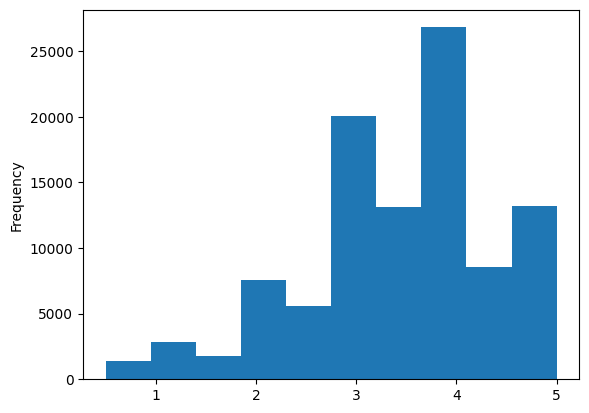

In [94]:
# Metodo 1 (recomendado para etiqueta de variable de dos o mas palabras separadas):
# Desplegar un histograma haciendo referencia a la variable como una serie
notas_df["puntaje"].plot(kind="hist")

<Axes: ylabel='Frequency'>

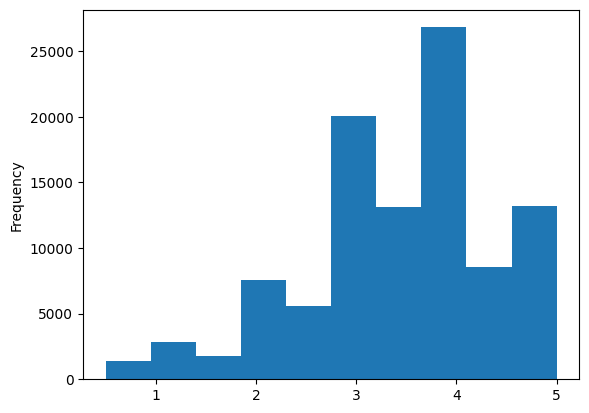

In [71]:
# Metodo 2 (práctico):
# Desplegar un histograma haciendo referencia a la variable como un atributo
notas_df.puntaje.plot(kind="hist")

In [72]:
# Si vemos el histograma anterior en terminos de acumulación de puntos en el gráfico
#¿Que puntaje (valor) divide los valores en dos partes que tienen la misma cantidad de puntos? ese valor es la media
print("La media es", notas_df.puntaje.mean())
print("La mediana es", notas_df.puntaje.median())

La media es 3.501556983616962
La mediana es 3.5


**Observación:** el 50% de los valores de la variable puntaje se encuentran por debajo del valor 3.5

### Medidas de tendencias estadísticas

In [95]:
# ¿Que método retorna las principales medidas de tendencia estadísticas de una variable?
# Respuesta: El método .describe()
notas_df.puntaje.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: puntaje, dtype: float64

### Gráficos que muestran las medidas de tendencias

<Axes: >

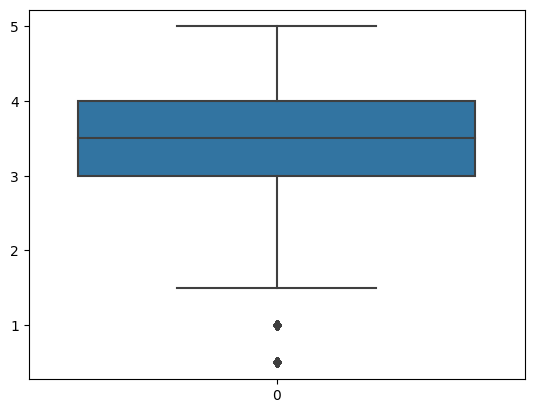

In [96]:
# ¿Como mostrar en una solo gráfico las medidas de tendencia de una variable?
# Respuesta: Usando el método sns.boxplot()
sns.boxplot(notas_df.puntaje)

<Axes: xlabel='puntaje'>

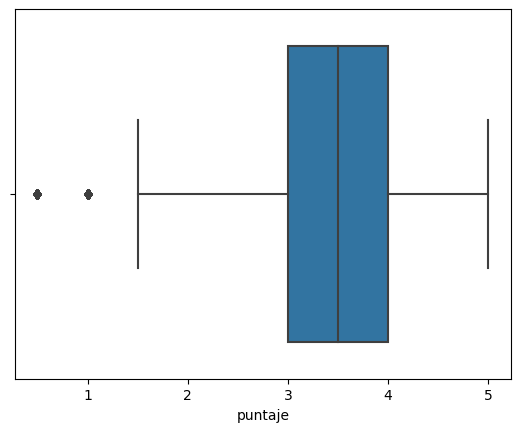

In [109]:
# ¿Cómo indicar la horientación del gráfico de caja?
# Respuesta: Fijando el parametro "x" para orientación horizontal y "y" es para horientación vertical (por defecto)
sns.boxplot(x=notas_df.puntaje)

### Análisis del dataset movies

In [97]:
#load our data from CSV
movies_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231025-2-Data-science-primeros-pasos/Dataset/movies.csv'
peliculas_data = pd.read_csv(movies_data_file_path)
peliculas_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [98]:
# Estarandizamos los nombres de las variables del dataset usando la notación camelCase
peliculas_data.columns = ["peliculaId","titulo","genero"]
peliculas_data.head()

,peliculaId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [77]:
# ¿Cómo consultar una variable filtrando por un valor específico?
# Respuesta: Usar el método .query("variable == [valor]")
notas_df.query("peliculaId==1")

,usuarioId,peliculaId,puntaje,fechaHora
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [78]:
# ¿Cómo consultar el puntaje promedio de una pelicula (media de un valor específico)?
# Respuesta: Filtrar con el metodo .query() para indicar el valor especifico y aplicar .mean() a la variable donde estan los valores a promediar
promedioPId1= notas_df.query("peliculaId==1").puntaje.mean()
print("El puntaje promedio de la pelicula con Id=1 es:", promedioPId1)

El puntaje promedio de la pelicula con Id=1 es: 3.9209302325581397


### Consultar el promedio de cada uno de los valores de una variable en una sola tabla

In [79]:
# ¿Cómo consultar la media de los valores de variableB para todos los valores de variableA?
# Solución: Agrupando por cada valor con el metodo .groupby("[variableA]").variableB.mean()
# Ejemplo: Calcular el promedio de puntaje (variable B) de cada una de las películas (variable A)
notas_df.groupby("peliculaId").puntaje.mean()

peliculaId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: puntaje, Length: 9724, dtype: float64

<Axes: ylabel='Frequency'>

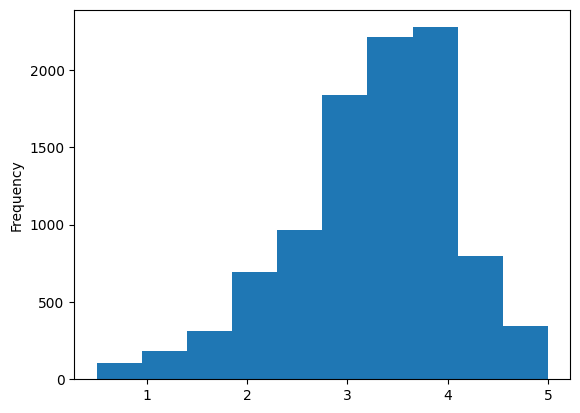

In [99]:
# ¿Cómo desplegar un histograma con la libreria Pandas para estudiar la distribución de los valores obtenidos de una operación de agregación?
# Respuesta: Se guarda la salida de la consulta en un objeto lista y se pasa como parámetro al método de graficación plot()
# Ejemplo: Histograma de los promedios por películas
promedio_por_pelicula = notas_df.groupby("peliculaId").puntaje.mean()
promedio_por_pelicula.plot(kind="hist")

<Axes: xlabel='puntaje'>

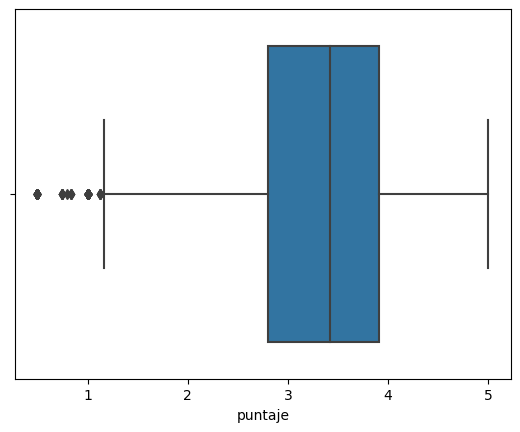

In [113]:
# ¿Cual es la diferencia en la distribución de los puntajes y de los promedios de puntajes por peliculas?
# Respuesta: Gráficamos un diagrama de caja y comparamos con los valores de tendencias estadisticas
sns.boxplot(x=promedio_por_pelicula)
# Error corregido: En el caso de generar un objeto a partir de una agregación es recomendable fijar explicitamente la horientación del diagrama de caja.

In [103]:
promedio_por_pelicula.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: puntaje, dtype: float64

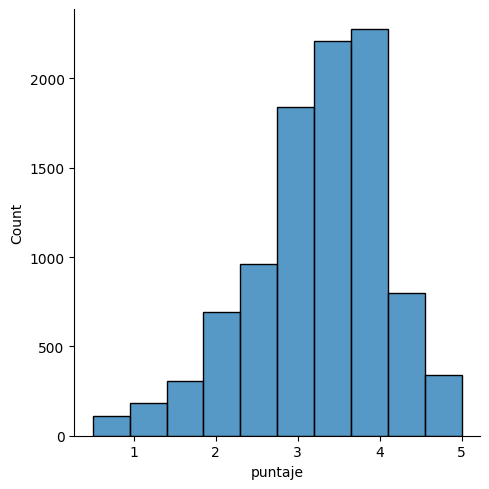

In [107]:
# ¿Cómo trazar un histograma personalizable con la libreria Seaborn?
# Respuesta: Usando el metodo sns.displot() y el parametro bins=[numero_de_particiones]
sns.displot(promedio_por_pelicula, bins=10)

Text(0.5, 1.0, 'Histograma de distribución de promedios por películas')

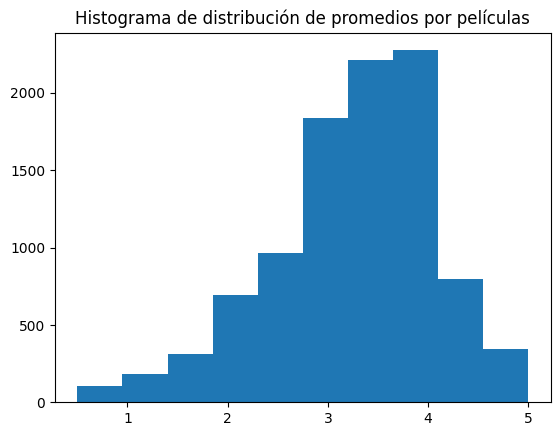

In [110]:
# ¿Cómo trazar un histograma personalizable con la libreraia Matplolib?
# Respuesta: Usando el metodo plt.hist()
plt.hist(promedio_por_pelicula)
plt.title("Histograma de distribución de promedios por películas")

<Axes: ylabel='puntaje'>

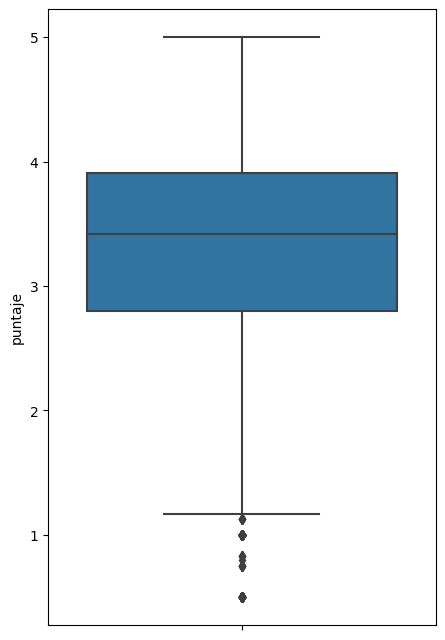

In [121]:
# ¿Cómo personalizar un diagrama de caja a partir de la libreria Matplolib?
# Respuesta: Fijar el parametro con plt y luego trazar el diagrama con sns.boxplot()
# ejemlo: Fijar las dimensiones del diagrama de caja
plt.figure(figsize=(5,8))
sns.boxplot(y=promedio_por_pelicula)


### Gráfico de una categoria de un dataset sin convertir a Dataframe

In [ ]:
#load our data from CSV
tmdb_movies_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231025-2-Data-science-primeros-pasos/Dataset/tmdb_5000_movies.csv'
tmdb_data = pd.read_csv(tmdb_movies_data_file_path)
tmdb_data.head(2)

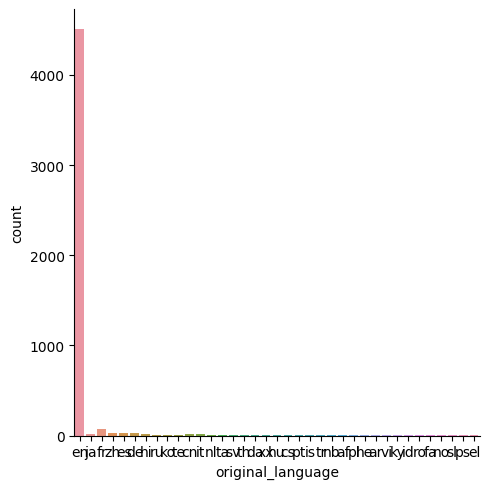

In [125]:
# ¿Cómo trazar un gráfico de la frecuencia de una variable cualitativa a partir del dataset?
# Respuesta: Usando el metodo sns.catplot() de la librería Seaborn
# Ejemplo: Gráfico de barras de la frecuencia de la variable categorica "original_language" del dataset "tmdb_data"
sns.catplot(x="original_language", kind="count", data =tmdb_data)